## Preprocessing

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

In [2]:
#Read in the train/test files that have been created from the prior projects. This is an 80/20 split
train_file = 'train.csv'
test_file = 'test.csv'
test_filepath_BC = '/home/jbcroom/'
train_filepath_BC = '/home/jbcroom/'
test_filepath_BC2 = 'C:/RAI/'
train_filepath_BC2 = 'C:/RAI/'

test_filepath_AR = 'C:/Users/Allison/JupyterNotebook/Data/Train_Test_Files/'
train_filepath_AR = 'C:/Users/Allison/JupyterNotebook/Data/Train_Test_Files/'

test_filepath_JB = ''
train_filepath_JB = ''

test_filepath_SO = ''
train_filepath_SO = ''

df_test = pd.read_csv(test_filepath_AR + test_file)
df_train = pd.read_csv(train_filepath_AR + train_file)

df_train.head()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
0,0,1.0,39.865147,-84.058723,0.01,36.9,22.6,91.0,29.68,10.0,9.2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,314.0,OH,US/Eastern,2016-02-08 05:46:00,Light Rain,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,39.928059,-82.831184,0.01,37.9,22.6,100.0,29.65,10.0,9.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,30.0,OH,US/Eastern,2016-02-08 06:07:59,Light Rain,Feb,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,39.063148,-84.032608,0.01,36.0,33.3,100.0,29.67,10.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0,OH,US/Eastern,2016-02-08 06:49:27,Overcast,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.0,39.747753,-84.205582,0.01,35.1,31.0,96.0,29.64,9.0,4.6,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,30.0,OH,US/Eastern,2016-02-08 07:23:34,Mostly Cloudy,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.0,39.627781,-84.188354,0.01,36.0,33.3,89.0,29.65,6.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,30.0,OH,US/Eastern,2016-02-08 07:39:07,Mostly Cloudy,Feb,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [3]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Severity']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
    'TMC_201.0','TMC_202.0','TMC_203.0',
    'TMC_206.0','TMC_222.0','TMC_229.0',
    'TMC_236.0','TMC_239.0','TMC_241.0',
    'TMC_244.0','TMC_245.0','TMC_246.0',
    'TMC_247.0','TMC_248.0','TMC_336.0',
    'TMC_339.0','TMC_341.0','TMC_343.0',
    'TMC_351.0','TMC_406.0'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [4]:
df_X_train.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado
0,39.865147,-84.058723,0.01,36.9,22.6,91.0,29.68,10.0,9.2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,314.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,39.928059,-82.831184,0.01,37.9,22.6,100.0,29.65,10.0,9.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,30.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,39.063148,-84.032608,0.01,36.0,33.3,100.0,29.67,10.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,39.747753,-84.205582,0.01,35.1,31.0,96.0,29.64,9.0,4.6,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,30.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,39.627781,-84.188354,0.01,36.0,33.3,89.0,29.65,6.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,30.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train['Severity'].value_counts(normalize=True) 

0.0    0.643821
1.0    0.356179
Name: Severity, dtype: float64

In [6]:
X_train['Severity'].value_counts(normalize=True )

0.0    0.634936
1.0    0.365064
Name: Severity, dtype: float64

In [7]:
X_val['Severity'].value_counts(normalize=True)

0.0    0.679362
1.0    0.320638
Name: Severity, dtype: float64

In [71]:
cols=df_X_train.columns.to_numpy()


In [8]:
#Convert dataframes to numpy arrays

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Y_train = df_Y_train.to_numpy()
Y_test = df_Y_test.to_numpy()

print("X-train: ",X_train.shape)
print("X-test: ",X_test.shape)
print("Y-train: ",Y_train.shape)
print("Y-test: ",Y_test.shape)

X-train:  (1408140, 122)
X-test:  (352036, 122)
Y-train:  (1408140,)
Y-test:  (352036,)


In [9]:
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss

In [10]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

In [11]:
from sklearn.tree import DecisionTreeClassifier
import math

In [49]:
len(X_train_scaled) * .01

14081.4

In [60]:
# how to make it generalize a bit better? 
#look at f1 score, precision, recall, balanced accuracy
#may better than optimizing log loss because of class imbalances, accuracy is not a great measure
#precision and recall will be more important since we're interested in the smaller class (high severity)

# run 1
# defaults
# dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
#                                 min_samples_split=2, min_samples_leaf=1, 
#                                 max_features=None,
#                                 max_leaf_nodes=None)

# run2
# overwrite with prepruning methods
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
#                                 min_samples_split=1000, min_samples_leaf=1, 
#                                 max_leaf_nodes=None)

# run3
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
#                                 min_samples_split=2, min_samples_leaf=1, 
#                                 max_features=None,
#                                 max_leaf_nodes=None,
#                                random_state=123)

# run4
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
#                                 min_samples_split=2, min_samples_leaf=1, 
#                                 max_features="sqrt",
#                                 max_leaf_nodes=None,
#                                random_state=123)

# run5
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=36, 
#                                 min_samples_split=2, min_samples_leaf=1, 
#                                 max_features=None,
#                                 max_leaf_nodes=None,
#                                random_state=123)

# min_split = math.ceil(len(X_train_scaled) * .01)

# run6
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
#                                 min_samples_split=min_split, min_samples_leaf=1, 
#                                 max_features=None,
#                                 max_leaf_nodes=None,
#                                random_state=123)


min_split = math.ceil(len(X_train_scaled) * .1)

# run7
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                min_samples_split=min_split, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)

In [12]:
max_depths = np.arange(2,74,step=2)
max_depths

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72])

In [13]:
acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_depth in max_depths:
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    
    train_yhat = dt_clf.predict(X_train_scaled)
    train_class_prob = dt_clf.predict_proba(X_train_scaled)
    
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    
    print ('Max depth:', max_depth)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('TEST')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")

Max depth: 2
TRAIN
 Accuracy: 0.6485874984021475
 Precision: 0.5103588830534213
 Recall: 0.9211688885171215
 Log Loss: 0.5487974447132079
TEST
 Accuracy: 0.6197661602790624
 Precision: 0.45442697019723693
 Recall: 0.9266806052659555
 Log Loss: 0.5374222582250363
---
Max depth: 4
TRAIN
 Accuracy: 0.6565483545670174
 Precision: 0.5165322523693168
 Recall: 0.9248377138121741
 Log Loss: 0.5355098662836896
TEST
 Accuracy: 0.6267086320717199
 Precision: 0.4593690541950531
 Recall: 0.9283018533612105
 Log Loss: 0.5284664492938433
---
Max depth: 6
TRAIN
 Accuracy: 0.6672248498018662
 Precision: 0.776190302632698
 Recall: 0.12428291584072708
 Log Loss: 0.5220657004266044
TEST
 Accuracy: 0.7017520935358884
 Precision: 0.6521034349671941
 Recall: 0.14968638151599986
 Log Loss: 0.521640718927509
---
Max depth: 8
TRAIN
 Accuracy: 0.6973951453690684
 Precision: 0.6699188185608358
 Recall: 0.3372693123967778
 Log Loss: 0.5088282531034892
TEST
 Accuracy: 0.7164040041359406
 Precision: 0.59856089007135

Max depth: 64
TRAIN
 Accuracy: 0.9997329810956297
 Precision: 0.9998306928554331
 Recall: 0.9994378099097189
 Log Loss: 0.00043386395636807516
TEST
 Accuracy: 0.8383716438091559
 Precision: 0.7248559928659227
 Recall: 0.7993284666359545
 Log Loss: 5.568609600820064
---
Max depth: 66
TRAIN
 Accuracy: 0.999814649111594
 Precision: 0.999933835148326
 Recall: 0.9995584181643813
 Log Loss: 0.0002780670512916637
TEST
 Accuracy: 0.8382523378290857
 Precision: 0.7243700310471805
 Recall: 0.7999220383429604
 Log Loss: 5.579162769691883
---
Max depth: 68
TRAIN
 Accuracy: 0.9998380842813924
 Precision: 0.9999649716172799
 Recall: 0.9995914881696919
 Log Loss: 0.00023239959629331493
TEST
 Accuracy: 0.8386926337079162
 Precision: 0.725413130144033
 Recall: 0.7995765264538077
 Log Loss: 5.567951693940351
---
Max depth: 70
TRAIN
 Accuracy: 0.9998487366313009
 Precision: 0.9999961078287133
 Recall: 0.9995895428752619
 Log Loss: 0.00021192508399912725
TEST
 Accuracy: 0.8385307184492495
 Precision: 0.72

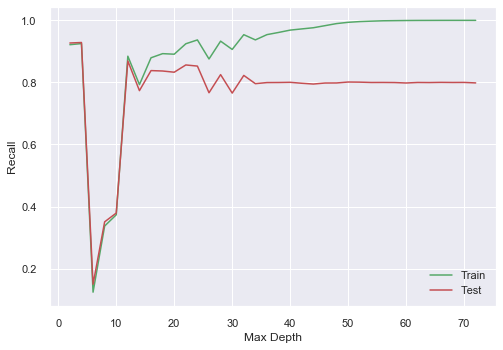

In [14]:
# fig = plt.figure()

plt.plot(max_depths, train_rec_results, 'g', label="Train")
plt.plot(max_depths, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Depth")
plt.show()

In [11]:
# see results in 20200229 Varying Tree Depths.txt

max_depths = np.linspace(1, 74, 74, endpoint=True)

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]
depth_results=[]

for max_depth in max_depths:
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
    depth=dt_clf.get_depth()
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
    depth_results.append(depth)
    
    print ('Tree depth:', depth)
    print ('Accuracy:', acc)
    print ('Precision:', prec)
    print ('Recall:', rec)
    print ('Log Loss:', ll)
    print ("---")

Tree depth: 1
Accuracy: 0.6793623379427104
Precision: 0.0
Recall: 0.0
Log Loss: 0.6578511460004427
---
Tree depth: 2
Accuracy: 0.6197661602790624
Precision: 0.45442697019723693
Recall: 0.9266806052659555
Log Loss: 0.615506933824709
---
Tree depth: 3
Accuracy: 0.6944829506073242
Precision: 0.6443877827808822
Recall: 0.10523051844501931
Log Loss: 0.6106049149772507
---
Tree depth: 4
Accuracy: 0.6267086320717199
Precision: 0.4593690541950531
Recall: 0.9283018533612105
Log Loss: 0.6206198270974165
---
Tree depth: 5
Accuracy: 0.6984967446511152
Precision: 0.6226332653655695
Recall: 0.15149367447464474
Log Loss: 0.6148375613852317
---
Tree depth: 6
Accuracy: 0.7017520935358884
Precision: 0.6521034349671941
Recall: 0.14968638151599986
Log Loss: 0.6063554489219452
---
Tree depth: 7
Accuracy: 0.7123845288550035
Precision: 0.6060036839129721
Recall: 0.2943849888373082
Log Loss: 0.6008017080234275
---
Tree depth: 8
Accuracy: 0.7164040041359406
Precision: 0.5985608900713508
Recall: 0.3507920195612

Tree depth: 63
Accuracy: 0.838206887931916
Precision: 0.7246807724142365
Recall: 0.7989297990715475
Log Loss: 11.144680340222868
---
Tree depth: 64
Accuracy: 0.8383716438091559
Precision: 0.7248559928659227
Recall: 0.7993284666359545
Log Loss: 11.144680340222868
---
Tree depth: 65
Accuracy: 0.8383034689634015
Precision: 0.7251756638200945
Recall: 0.798203338176406
Log Loss: 11.144680340222868
---
Tree depth: 66
Accuracy: 0.8382523378290857
Precision: 0.7243700310471805
Recall: 0.7999220383429604
Log Loss: 11.143503002346234
---
Tree depth: 67
Accuracy: 0.8381728005090389
Precision: 0.7245026623726036
Recall: 0.7991955774478189
Log Loss: 11.143503002346234
---
Tree depth: 68
Accuracy: 0.8386926337079162
Precision: 0.725413130144033
Recall: 0.7995765264538077
Log Loss: 11.144680340222868
---
Tree depth: 69
Accuracy: 0.838374484427729
Precision: 0.7248726559863737
Recall: 0.7993018887983274
Log Loss: 11.144680340222868
---
Tree depth: 70
Accuracy: 0.8385307184492495
Precision: 0.725015862

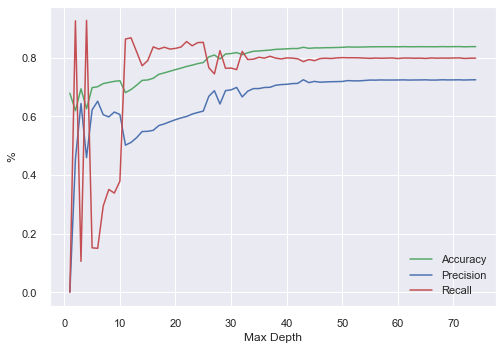

In [17]:
line3=plt.plot(max_depths, acc_results, 'g', label="Accuracy")
line1=plt.plot(max_depths, prec_results, 'b', label="Precision")
line2=plt.plot(max_depths, rec_results, 'r', label="Recall")

plt.legend()

plt.ylabel("%")
plt.xlabel("Max Depth")
plt.show()

In [18]:
min_samples_splits = np.linspace(0.05, 0.5, 10, endpoint=True)
min_samples_splits

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [19]:
acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]
depth_results=[]

for min_samples_split in min_samples_splits:
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=45, 
                                min_samples_split=min_samples_split, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
    depth=dt_clf.get_depth()
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
    depth_results.append(depth)
    
    print ('Min samples split:', min_samples_split)
    print ('Tree depth:', depth)
    print ('Accuracy:', acc)
    print ('Precision:', prec)
    print ('Recall:', rec)
    print ('Log Loss:', ll)
    print ("---")

Min samples split: 0.05
Tree depth: 28
Accuracy: 0.7163131043416014
Precision: 0.5428306136157098
Recall: 0.730279244480669
Log Loss: 0.6508778171171585
---
Min samples split: 0.1
Tree depth: 20
Accuracy: 0.7119840016361964
Precision: 0.538456901748041
Recall: 0.7122594705694745
Log Loss: 0.599118372987808
---
Min samples split: 0.15000000000000002
Tree depth: 20
Accuracy: 0.7119840016361964
Precision: 0.538456901748041
Recall: 0.7122594705694745
Log Loss: 0.5894648659649812
---
Min samples split: 0.2
Tree depth: 19
Accuracy: 0.7122339760706291
Precision: 0.5388139800093915
Recall: 0.7115861653495872
Log Loss: 0.5894648659649812
---
Min samples split: 0.25
Tree depth: 15
Accuracy: 0.7005079026008704
Precision: 0.5233038643592376
Recall: 0.7404585562918601
Log Loss: 0.5894648659649812
---
Min samples split: 0.3
Tree depth: 14
Accuracy: 0.7005079026008704
Precision: 0.5233038643592376
Recall: 0.7404585562918601
Log Loss: 0.5894648659649812
---
Min samples split: 0.35000000000000003
Tree 

In [36]:
max_features = np.ceil(np.linspace(5, 122, 10, endpoint=True)).astype(int)
max_features

array([  5,  18,  31,  44,  57,  70,  83,  96, 109, 122])

In [39]:
acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]
depth_results=[]

for max_feat in max_features:
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=max_feat,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
    depth=dt_clf.get_depth()
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
    depth_results.append(depth)
    
    print ('Max features:', max_feat)
    print ('Tree depth:', depth)
    print ('Accuracy:', acc)
    print ('Precision:', prec)
    print ('Recall:', rec)
    print ('Log Loss:', ll)
    print ("---")

Max features: 5
Tree depth: 90
Accuracy: 0.6920996716244929
Precision: 0.5174981268731269
Recall: 0.5874233672348418
Log Loss: 16.131589251177736
---
Max features: 18
Tree depth: 92
Accuracy: 0.7372711881739368
Precision: 0.5797399630753826
Recall: 0.6565346043445905
Log Loss: 12.149243883461315
---
Max features: 31
Tree depth: 77
Accuracy: 0.7796731016146076
Precision: 0.6393424510507998
Recall: 0.7177167865622452
Log Loss: 15.258298881184027
---
Max features: 44
Tree depth: 71
Accuracy: 0.7992591666761354
Precision: 0.669597222668681
Recall: 0.7381728622559268
Log Loss: 15.365338516468059
---
Max features: 57
Tree depth: 78
Accuracy: 0.8095592496221977
Precision: 0.6831953060049881
Recall: 0.7571582976009071
Log Loss: 18.15670851047893
---
Max features: 70
Tree depth: 65
Accuracy: 0.8262649274506016
Precision: 0.7069775632559294
Recall: 0.7824692583011447
Log Loss: 11.139578542757452
---
Max features: 83
Tree depth: 65
Accuracy: 0.8391016827824427
Precision: 0.726319263337519
Recall:

In [49]:
dt_clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=25, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)

dt_clf_ent.fit(X_train_scaled, Y_train)
yhat = dt_clf_ent.predict(X_test_scaled)
class_probabilities = dt_clf_ent.predict_proba(X_test)
#class_probabilities = dt_clf.predict(X_test)


In [50]:
acc = mt.accuracy_score(Y_test, yhat)
prec = mt.precision_score(Y_test, yhat)
rec = mt.recall_score(Y_test, yhat)
ll = multiclass_log_loss(Y_test, class_probabilities)
depth=dt_clf_ent.get_depth()
print ('Accuracy:', acc)
print ('Precision:', prec)
print ('Recall:', rec)
print ('Log Loss:', ll)
print ('Tree depth:', depth)

# run3 with entropy
# Accuracy: 0.8386102557692964
# Precision: 0.725367230275694
# Recall: 0.7992753109607003
# Log Loss: 11.143503002346234
# Tree depth: 74

# run4 with sqrt max features
# Accuracy: 0.7075725209921713
# Precision: 0.539483623698921
# Recall: 0.6010666572167689
# Log Loss: 18.04937454072574
# Tree depth: 86

#run5 with max depth 36
# Accuracy: 0.8253303639400515
# Precision: 0.6990810333338499
# Recall: 0.7993018887983274
# Log Loss: 11.144680340222868
# Tree depth: 36

#run6 with min sample split of 1% of data
# Accuracy: 0.750056812371462
# Precision: 0.5931643768951447
# Recall: 0.7018852546156845
# Log Loss: 0.6036772771365679
# Tree depth: 44

#run7 with min sample split of 10% of data
# Accuracy: 0.7119840016361964
# Precision: 0.538456901748041
# Recall: 0.7122594705694745
# Log Loss: 0.599118372987808
# Tree depth: 20

# entropy and max depth of 25
# Accuracy: 0.7841925257644105
# Precision: 0.6185053883601146
# Recall: 0.8531928842269393
# Log Loss: 11.144680340222868
# Tree depth: 25

# gini and max depth of 25
# Accuracy: 0.7996881000806736
# Precision: 0.6622266477729692
# Recall: 0.7659467025762784
# Log Loss: 11.927610028184858
# Tree depth: 25

Accuracy: 0.7841925257644105
Precision: 0.6185053883601146
Recall: 0.8531928842269393
Log Loss: 11.144680340222868
Tree depth: 25


In [63]:
#dt_clf.get_n_leaves()
dt_clf_ent.n_features_

122

In [52]:
mt.precision_recall_fscore_support(Y_test,yhat)

(array([0.91559619, 0.61850539]),
 array([0.75162653, 0.85319288]),
 array([0.82554823, 0.71713667]),
 array([239160, 112876], dtype=int64))

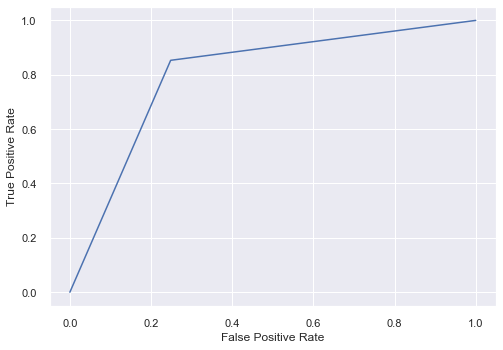

In [53]:
from matplotlib import pyplot
auc=mt.roc_auc_score(Y_test,yhat)
fpd, tpr, _ = mt.roc_curve(Y_test,yhat)
pyplot.plot(fpd,tpr)
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.show()

F1 Score is  0.7171366658971935
AUC is  0.759385081480951


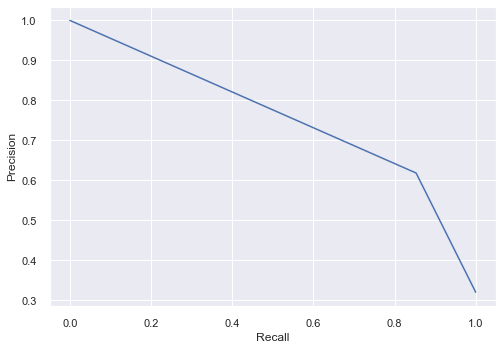

In [54]:
# precision is # true high severities / (# true high severities + # low severities classified high)
# recall is # true high severities / (# true high severities + # high severities classified low)
# we want recall to be as close to 1 as possible

precision, recall, _ = mt.precision_recall_curve(Y_test, yhat)
f1, auc = mt.f1_score(Y_test, yhat), mt.auc(recall, precision)

print("F1 Score is ", f1)
print("AUC is ", auc)

pyplot.plot(recall, precision)
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
pyplot.show()

In [55]:
conf = mt.confusion_matrix(Y_test,yhat)
conf

array([[179759,  59401],
       [ 16571,  96305]], dtype=int64)

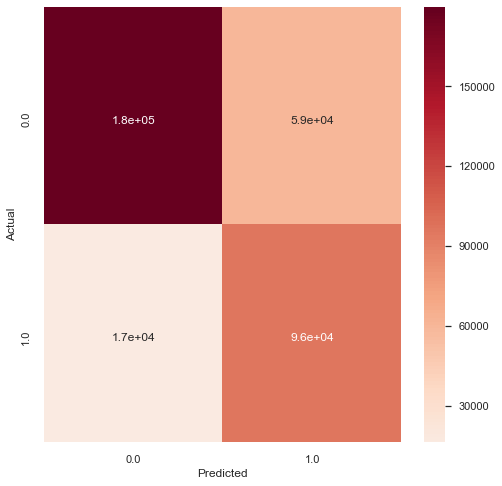

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

confusion_matrix = pd.crosstab(Y_test, yhat, rownames=['Actual'], colnames=['Predicted'])


annot_kws = {"ha": 'center',"va": 'top'}
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws=annot_kws, cmap ='RdBu_r', center=0)

In [70]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dt_clf_ent, 
 out_file=dot_data, 
 class_names=severity, # the target names.
 feature_names=cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

TypeError: can only concatenate str (not "int") to str

In [62]:
# max_depths = np.linspace(1, 74, 74, endpoint=True)
max_depths = np.arange(2,74,step=2)
max_depths

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72])

In [72]:
acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 42, max_depth=max_depth)
    rf.fit(X_train_scaled, Y_train)
    
    train_yhat = rf.predict(X_train_scaled)
    train_class_prob = rf.predict_proba(X_train_scaled)
    
    yhat = rf.predict(X_test_scaled)
    class_probabilities = rf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    
    print ('Max depth:', max_depth)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('TEST')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")

Max depth: 2
TRAIN
 Accuracy: 0.6356661979632707
 Precision: 0.8882175226586103
 Recall: 0.0022876662497252273
 Log Loss: 0.5921106678229487
TEST
 Accuracy: 0.6797401402129327
 Precision: 0.6348884381338742
 Recall: 0.002772954392430632
 Log Loss: 0.5734699479744755
---
Max depth: 4
TRAIN
 Accuracy: 0.6567266038888179
 Precision: 0.7975562451512801
 Recall: 0.07999439755204149
 Log Loss: 0.5689831057037925
TEST
 Accuracy: 0.6959089411310206
 Precision: 0.7146120403802225
 Recall: 0.08591728976930436
 Log Loss: 0.5517709278893939
---
Max depth: 6
TRAIN
 Accuracy: 0.7010936412572614
 Precision: 0.7197965279514537
 Recall: 0.29673521235806644
 Log Loss: 0.5359158082788748
TEST
 Accuracy: 0.7277295503868922
 Precision: 0.6479759442406966
 Recall: 0.3302739289131436
 Log Loss: 0.5238223442547765
---
Max depth: 8
TRAIN
 Accuracy: 0.697020182652293
 Precision: 0.717056553929577
 Recall: 0.28090635158084354
 Log Loss: 0.5319788172791786
TEST
 Accuracy: 0.7211989682873342
 Precision: 0.63977678

Max depth: 64
TRAIN
 Accuracy: 0.9908006306191146
 Precision: 0.9942556284780374
 Recall: 0.9804653533335538
 Log Loss: 0.10851315280802247
TEST
 Accuracy: 0.7704439318706041
 Precision: 0.6441052745119189
 Recall: 0.6348382295616428
 Log Loss: 0.7908382376998926
---
Max depth: 66
TRAIN
 Accuracy: 0.9906188305140113
 Precision: 0.9937829902771725
 Recall: 0.9804361739171032
 Log Loss: 0.10965941914049626
TEST
 Accuracy: 0.7695747025872354
 Precision: 0.6431056236481615
 Recall: 0.6321893050781389
 Log Loss: 0.7926369802640497
---
Max depth: 68
TRAIN
 Accuracy: 0.9910712003067876
 Precision: 0.9950914188682226
 Recall: 0.9803778150842021
 Log Loss: 0.10642980322406793
TEST
 Accuracy: 0.7714551920826279
 Precision: 0.6490903739675883
 Recall: 0.6252259116198307
 Log Loss: 0.8056993337279521
---
Max depth: 70
TRAIN
 Accuracy: 0.9910640987401821
 Precision: 0.9951754074144291
 Recall: 0.9802747144794101
 Log Loss: 0.10641059704206066
TEST
 Accuracy: 0.7721965935302071
 Precision: 0.6498592

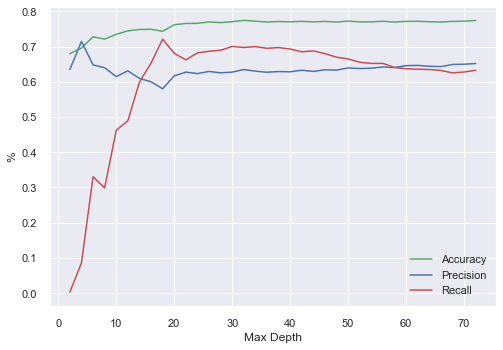

In [73]:
line3=plt.plot(max_depths, acc_results, 'g', label="Accuracy")
line1=plt.plot(max_depths, prec_results, 'b', label="Precision")
line2=plt.plot(max_depths, rec_results, 'r', label="Recall")

plt.legend()

plt.ylabel("%")
plt.xlabel("Max Depth")
plt.show()

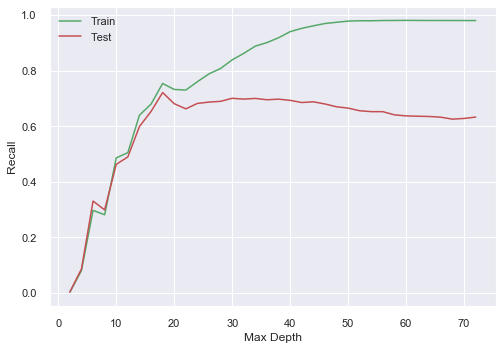

In [74]:
plt.plot(max_depths, train_rec_results, 'g', label="Train")
plt.plot(max_depths, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Depth")
plt.show()

In [32]:
# Instantiate model with n decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [33]:
%%time

rf.fit(X_train_scaled, Y_train)
rf_yhat = dt_clf.predict(X_test_scaled)
rf_class_probabilities = rf.predict_proba(X_test)

# rf with 10 trees - 2 min
# Accuracy: 0.8019334430193344
# Log Loss: 0.6334775610043266

# rf with 100 trees - 15.5 min
# Accuracy: 0.8019334430193344
# Log Loss: 0.6561935280446589

Wall time: 15min 32s


In [ ]:
# Instantiate model with n decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 4)2

In [34]:
rf_acc = mt.accuracy_score(Y_test, rf_yhat)
rf_ll = multiclass_log_loss(Y_test, rf_class_probabilities)
print ('Accuracy:', rf_acc)
print ('Log Loss:', rf_ll)

Accuracy: 0.8019334430193344
Log Loss: 0.6561935280446589


In [36]:
mt.confusion_matrix(Y_test,rf_yhat)


array([[259737,  49679],
       [ 37479,  93149]], dtype=int64)

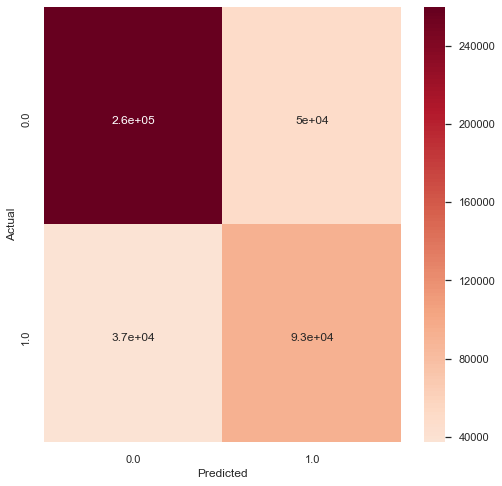

In [39]:
fig1, ax1 = plt.subplots(figsize=(8, 8))

rf_confusion_matrix = pd.crosstab(Y_test, rf_yhat, rownames=['Actual'], colnames=['Predicted'])


annot_kws1 = {"ha": 'center',"va": 'top'}
ax1 = sns.heatmap(rf_confusion_matrix, annot=True, annot_kws=annot_kws1, cmap ='RdBu_r', center=0)

In [ ]:

for train, test in X_train_scaled, Y_train:
    print ('Training Once:')
    
    # transform the data using pca
    pca.fit(X[train])
    X_train = pca.transform(X[train])
    X_test = pca.transform(X[test])
    
    # train the decision tree algorithm
    dt_clf.fit(X_train,y[train])
    yhat = dt_clf.predict(X_test)
    class_probabilities = dt_clf.predict_proba(X_test)
    
    # get accuracy and log loss of this training
    acc = mt.accuracy_score(y[test],yhat)
    ll = multiclass_log_loss(y[test], class_probabilities)
    print ('Accuracy:', acc)
    print ('Log Loss:', ll)
    
    # save accuracy, log loss, and params of run
    log_losses.append(ll)
    accuracies.append(acc)
    params.append(dt_clf.get_params())